In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import os
from pathlib import Path
import warnings

In [214]:
file_path = r"C:\Users\HP\Documents\Ecommerce_Sales_Prediction_Dataset.csv"

In [215]:
df = pd.read_csv(file_path)
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [216]:
my_path = Path("data")
my_path.mkdir(parents=True, exist_ok=True)

output_file = my_path / "ecommerce_output.csv"
df.to_csv(output_file, index=False)

In [217]:
df = pd.read_csv("data/ecommerce_output.csv")
print(df.head())

         Date Product_Category   Price  Discount Customer_Segment  \
0  01-01-2023           Sports  932.80     35.82       Occasional   
1  02-01-2023             Toys  569.48      3.60          Premium   
2  03-01-2023       Home Decor  699.68      3.56          Premium   
3  04-01-2023             Toys  923.27      0.61          Premium   
4  05-01-2023             Toys  710.17     47.83          Premium   

   Marketing_Spend  Units_Sold  
0          6780.38          32  
1          6807.56          16  
2          3793.91          27  
3          9422.75          29  
4          1756.83          17  


## Exploratory Data Analysis

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [219]:
df.isnull().sum()

Date                0
Product_Category    0
Price               0
Discount            0
Customer_Segment    0
Marketing_Spend     0
Units_Sold          0
dtype: int64

In [220]:
df.describe()

,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


Convert 'Date' column to datetime

In [221]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date'].dtype

dtype('<M8[ns]')

In [223]:
df['year'] = [date.year for date in df['Date']]
df['month'] = [date.month for date in df['Date']]
df['day'] = [date.day for date in df['Date']]

In [224]:
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,year,month,day
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32,2023,1,1
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16,2023,1,2
2,2023-01-03,Home Decor,699.68,3.56,Premium,3793.91,27,2023,1,3
3,2023-01-04,Toys,923.27,0.61,Premium,9422.75,29,2023,1,4
4,2023-01-05,Toys,710.17,47.83,Premium,1756.83,17,2023,1,5


In [225]:
df.duplicated().sum()

np.int64(0)

In [226]:
df['Customer_Segment'].unique()

array(['Occasional', 'Premium', 'Regular'], dtype=object)

In [227]:
df['Revenue']=round(df['Price']*df['Units_Sold'])
df

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,year,month,day,Revenue
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32,2023,1,1,29850.0
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16,2023,1,2,9112.0
2,2023-01-03,Home Decor,699.68,3.56,Premium,3793.91,27,2023,1,3,18891.0
3,2023-01-04,Toys,923.27,0.61,Premium,9422.75,29,2023,1,4,26775.0
4,2023-01-05,Toys,710.17,47.83,Premium,1756.83,17,2023,1,5,12073.0
...,...,...,...,...,...,...,...,...,...,...,...
995,2025-09-22,Fashion,740.06,49.06,Regular,1890.83,34,2025,9,22,25162.0
996,2025-09-23,Electronics,517.10,28.48,Premium,8011.66,21,2025,9,23,10859.0
997,2025-09-24,Electronics,683.43,12.98,Occasional,3408.51,19,2025,9,24,12985.0
998,2025-09-25,Sports,51.26,21.85,Occasional,7335.62,26,2025,9,25,1333.0


Revenue By Year

In [228]:
df_year = df.groupby('year')['Revenue'].sum()
df_year

year
2023    5475564.0
2024    5552401.0
2025    3974525.0
Name: Revenue, dtype: float64

# Data visualization

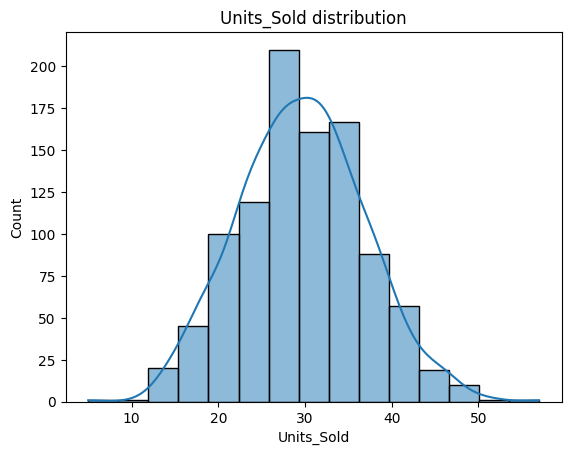

In [229]:
sns.histplot(df['Units_Sold'], bins=15, kde=True)
plt.title("Units_Sold distribution")

# Create output folder "images" in the same directory as script
images = Path("images")
images.mkdir(exist_ok=True)
# Save figure to PNG inside the "data" folder
plt.savefig(images / "units_sold_distribution.png", dpi=300, bbox_inches="tight")


plt.show()

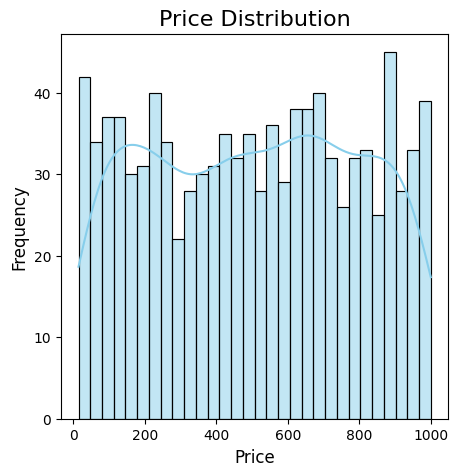

In [230]:
plt.figure(figsize=(5, 5))
sns.histplot(df['Price'], kde=True, bins=30, color='skyblue')
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.savefig(images / "Price_Distribution.png", dpi=300, bbox_inches="tight")
plt.show()

In [140]:
Customer = df['Customer_Segment'].value_counts()

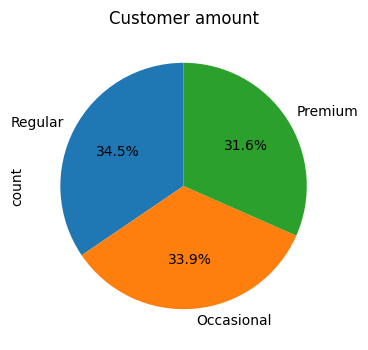

In [141]:
plt.figure(figsize = (4,4))
Customer.plot(kind = 'pie', autopct='%1.1f%%', labels=Customer.index, startangle=90)
plt.title("Customer amount")
Customer.name = None

plt.savefig(images / "Customer_amount.png", dpi=300, bbox_inches="tight")
plt.show()

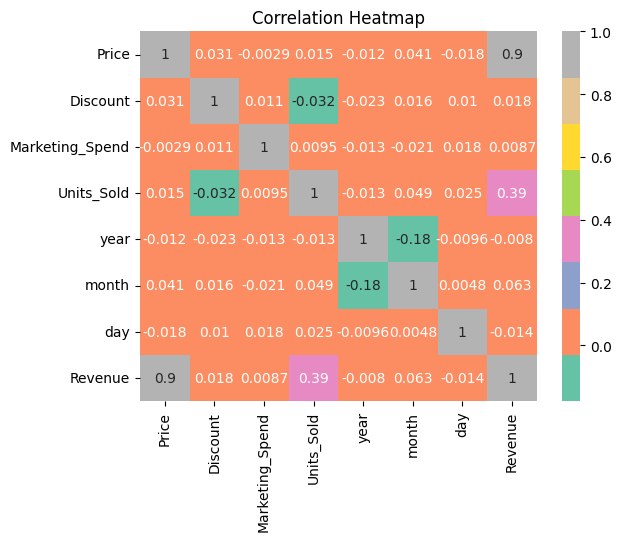

In [231]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.title('Correlation Heatmap')

plt.savefig(images / "Correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

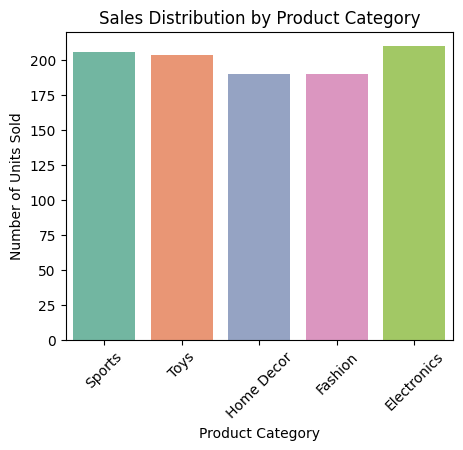

In [232]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Product_Category', palette='Set2')
plt.title('Sales Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Units Sold')
plt.xticks(rotation=45)

plt.savefig(images / "Sales_Distribution_by_Product_category.png", dpi=300, bbox_inches="tight")
plt.show()

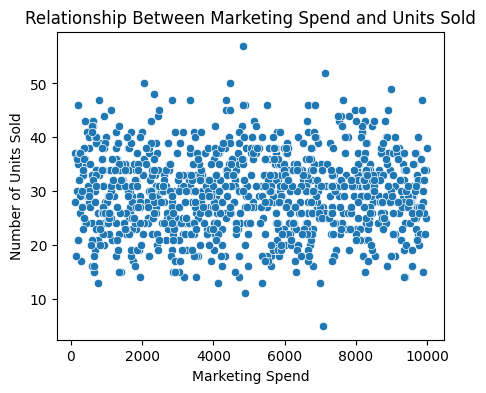

In [233]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='Marketing_Spend', y='Units_Sold', palette='Set2')
plt.title('Relationship Between Marketing Spend and Units Sold')
plt.xlabel('Marketing Spend')
plt.ylabel('Number of Units Sold')
plt.show()

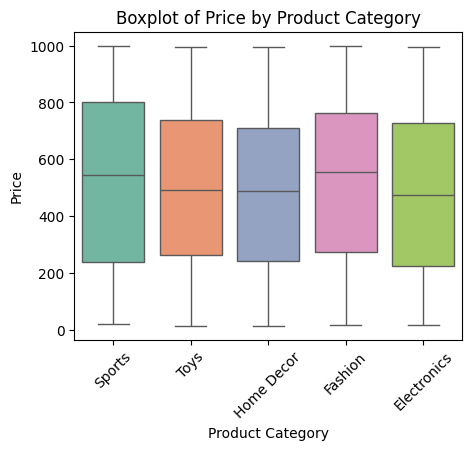

In [234]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Product_Category', y='Price', palette='Set2')
plt.title('Boxplot of Price by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.savefig(images / "Boxplot_of_price_by_product_category.png", dpi=300, bbox_inches="tight")
plt.show()

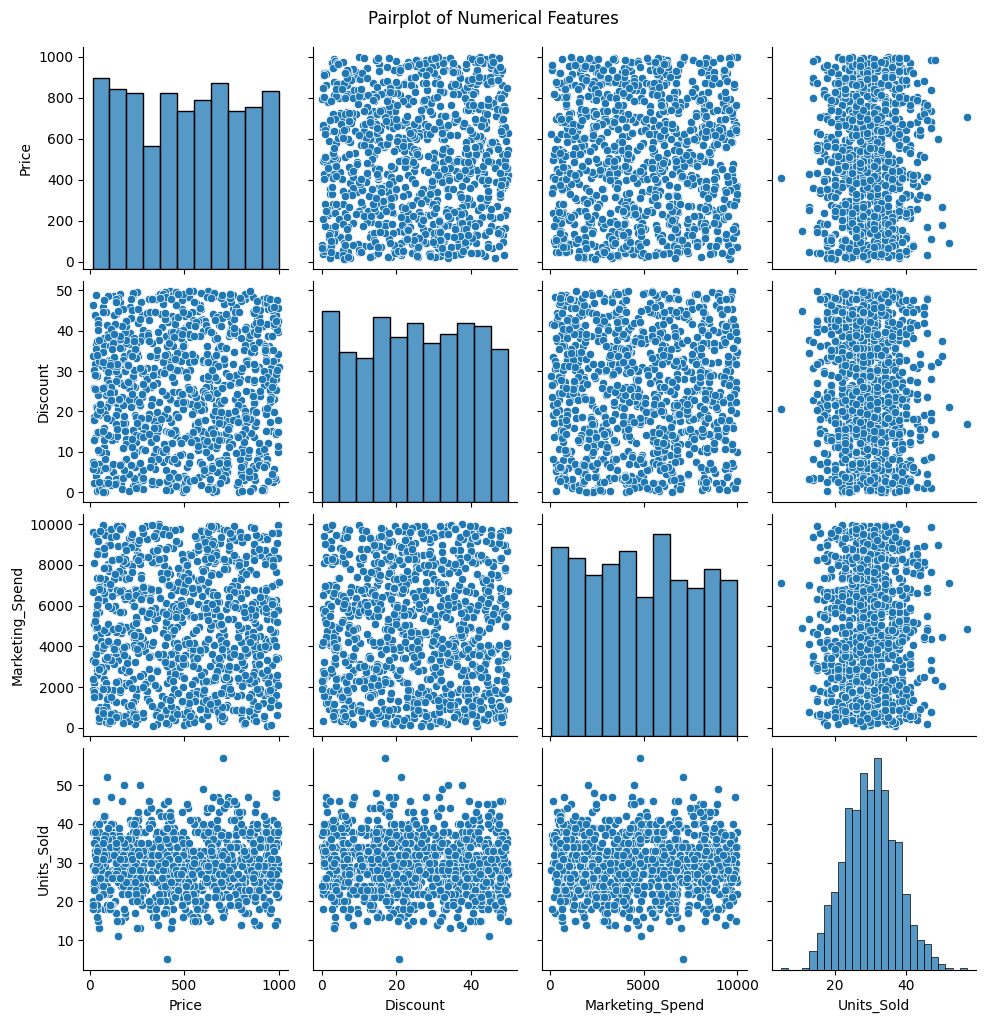

In [235]:

# Create pairplot
pairplot = sns.pairplot(df, vars=['Price', 'Discount', 'Marketing_Spend', 'Units_Sold'])
pairplot.fig.suptitle('Pairplot of Numerical Features', y=1.02)

# Save as PNG
pairplot_path = images / "pairplot.png"
pairplot.savefig(pairplot_path, dpi=300, bbox_inches="tight")

plt.show()

# Data Preprocessing

In [240]:
FEATURES = ['Price','Discount','Marketing_Spend','Product_Category','Customer_Segment']
TARGET = "Units_Sold"

In [241]:
X = df[FEATURES]
y = df[TARGET]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [242]:
numeric_features = ['Price','Discount','Marketing_Spend']
categorical_features = ['Product_Category','Customer_Segment']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first")

preprocessor_A = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [244]:
pipelines = {
    "Linear_Regression_A": Pipeline([
        ('preprocessor', preprocessor_A),
        ('regressor', LinearRegression())
    ]),
    "RandomForest_A": Pipeline([
        ('preprocessor', preprocessor_A),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
}

results = {}
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mae, mse, r2)
    print(f"{name} → MAE={mae:.2f}, MSE={mse:.2f}, R²={r2:.2f}")

Linear_Regression_A → MAE=5.96, MSE=55.99, R²=-0.04
RandomForest_A → MAE=6.11, MSE=59.97, R²=-0.11


In [245]:
RandomForest_A = Pipeline([
    ('preprocessor', preprocessor_A),   # scaling + one-hot encoding
    ('regressor', RandomForestRegressor(
        n_estimators=200, random_state=42, max_depth=None
    ))
])

# Fit model
RandomForest_A.fit(X_train, y_train)

# Predictions
y_pred = RandomForest_A.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RandomForest_A → MAE={mae:.2f}, MSE={mse:.2f}, R²={r2:.2f}")

RandomForest_A → MAE=6.05, MSE=58.42, R²=-0.08


In [249]:
import joblib
joblib.dump(RandomForest_A, "ecom_best_pipeline.pkl")
print(" RandomForest_A saved as ecom_best_pipeline.pkl")

 RandomForest_A saved as ecom_best_pipeline.pkl


Feature Importances:
 Marketing_Spend                0.301756
Price                          0.285847
Discount                       0.267640
Customer_Segment_Premium       0.026616
Product_Category_Sports        0.026086
Product_Category_Toys          0.025936
Customer_Segment_Regular       0.024952
Product_Category_Fashion       0.024246
Product_Category_Home Decor    0.016920
dtype: float64


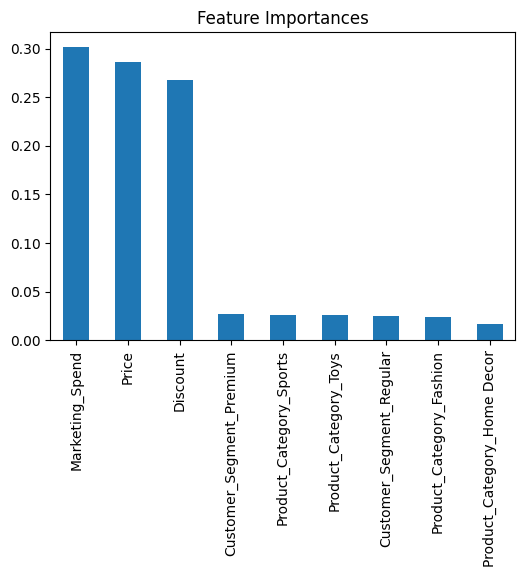

In [248]:
# Extract trained RandomForest
rf = RandomForest_A.named_steps['regressor']

# Get feature names after preprocessing
feature_names = (
    numeric_features + 
    list(RandomForest_A.named_steps['preprocessor']
         .transformers_[1][1]
         .get_feature_names_out(categorical_features))
)

importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("Feature Importances:\n", feat_importances)

# Plot
feat_importances.plot(kind='bar', figsize=(6,4), title="Feature Importances")
plt.show()